### Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Importing dataset

In [2]:
df=pd.read_csv('Paymentfrauddetection.csv')
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


### Dropping irrelevant features

In [3]:
df.drop(['nameOrig','nameDest','isFlaggedFraud'],axis=1,inplace=True)
df.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0


### EDA

In [4]:
df.shape

(6362620, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 8 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   oldbalanceOrg   float64
 4   newbalanceOrig  float64
 5   oldbalanceDest  float64
 6   newbalanceDest  float64
 7   isFraud         int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 388.3+ MB


In [6]:
df.isFraud.value_counts()
# we can see here data is unbalanced so we are going to balance the data

0    6354407
1       8213
Name: isFraud, dtype: int64

In [7]:
# Separating the data 
legit=df[df.isFraud==0]
fraud=df[df.isFraud==1]

### Under sampling

In [8]:
#We are going to update our dataframe and we are going to create new dataframe
# Number of fradulent tranasactions=8213
legit_sample=legit.sample(n=8213)

In [9]:
df1=pd.concat([legit_sample,fraud],axis=0)

#### df1 is going to our balanced dataframe

### EDA

In [10]:
df1.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
1570202,155,CASH_IN,345735.86,113168.0,458903.86,0.00,0.00,0
4810286,346,CASH_OUT,50016.69,50927.0,910.31,1972.77,51989.46,0
1571650,155,CASH_OUT,81028.02,0.0,0.00,160663.23,241691.25,0
2150767,184,PAYMENT,7774.78,67323.0,59548.22,0.00,0.00,0
1842418,163,CASH_OUT,107294.50,0.0,0.00,246554.85,353849.35,0


In [11]:
### Checking for null values
df1.isnull().sum()

step              0
type              0
amount            0
oldbalanceOrg     0
newbalanceOrig    0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64

In [12]:
df1.shape

(16426, 8)

In [13]:
df1.type.value_counts()

CASH_OUT    6967
TRANSFER    4825
PAYMENT     2792
CASH_IN     1793
DEBIT         49
Name: type, dtype: int64

In [14]:
df1.isFraud.value_counts()

0    8213
1    8213
Name: isFraud, dtype: int64

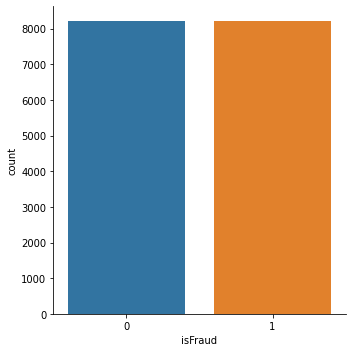

In [15]:
sns.catplot(x='isFraud',data=df1,kind='count')
#Now we can see that our data is balanced

### Manual Encoding

In [16]:
df1.replace({'type':{'CASH_OUT':0,'TRANSFER':1,'PAYMENT':2,'CASH_IN':4,'DEBIT':5}},inplace=True)

In [17]:
df1.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
1570202,155,4,345735.86,113168.0,458903.86,0.00,0.00,0
4810286,346,0,50016.69,50927.0,910.31,1972.77,51989.46,0
1571650,155,0,81028.02,0.0,0.00,160663.23,241691.25,0
2150767,184,2,7774.78,67323.0,59548.22,0.00,0.00,0
1842418,163,0,107294.50,0.0,0.00,246554.85,353849.35,0


### Plotting correlation heatmap

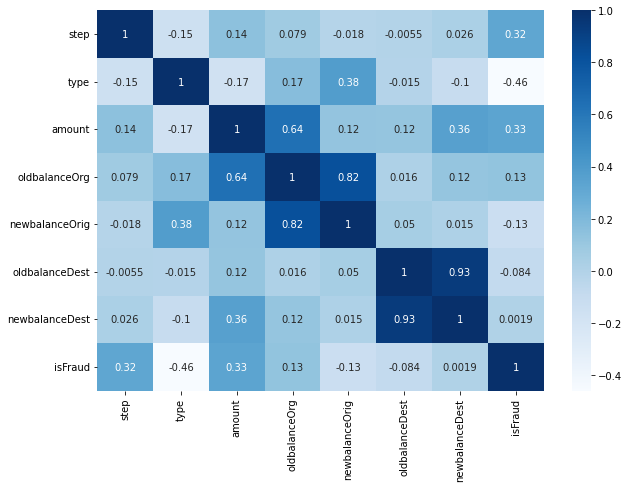

In [18]:
plt.figure(figsize=(10,7))
sns.heatmap(df1.corr(),annot=True,cmap='Blues')
plt.show()

### Separating our dependant and independant variables

In [19]:
X=df1.drop('isFraud',axis=1)
y=df1.isFraud

### Performing train-test split

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

### Feature scaling

In [21]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

### Fitting logistic regression algorithm

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,f1_score
lr=LogisticRegression()
lr.fit(X_train,y_train)
y_hat=lr.predict(X_test)
from sklearn.metrics import accuracy_score,f1_score
print("accuracy score:",accuracy_score(y_test,y_hat))
print("f1-score:",f1_score(y_test,y_hat))


accuracy score: 0.8432744978697505
f1-score: 0.8507678933642422


### Fitting support vector classifier

In [23]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(X_train,y_train)
y_hat1=svc.predict(X_test)
print("accuracy score:",accuracy_score(y_test,y_hat1))
print("f1-score:",f1_score(y_test,y_hat1))


accuracy score: 0.9233110164333537
f1-score: 0.9234972677595629


### Fitting random forest classifier

In [24]:
from sklearn.ensemble import RandomForestClassifier
rc=RandomForestClassifier()
rc.fit(X_train,y_train)
y_hat2=rc.predict(X_test)
print("accuracy score:",accuracy_score(y_test,y_hat2))
print("f1-score:",f1_score(y_test,y_hat2))


accuracy score: 0.9409616555082166
f1-score: 0.9439630271519354


### Fitting decision tree classifier

In [25]:
from sklearn.tree import DecisionTreeClassifier
dc=DecisionTreeClassifier()
dc.fit(X_train,y_train)
y_hat3=dc.predict(X_test)
print("accuracy score:",accuracy_score(y_test,y_hat3))
print("f1-score:",f1_score(y_test,y_hat3))



accuracy score: 0.9595252586731589
f1-score: 0.9607553850693419


#### Thus we are going to use Decision tree classifier as it has more accuracy

In [26]:
dc.predict([[402,2,3831.25,0.00,0.00,0.00,0.00]])

array([0], dtype=int64)

In [27]:
dc.predict([[743,0,339682.13,339682.13,0.0,0.00,339682.13]])

array([1], dtype=int64)